### Understand the Data

In [42]:
import pandas as pd 

df_movies = pd.read_csv('movies.csv', header = 0)
df_ps = pd.read_csv('past_screenings.csv', header = 0)


In [43]:
df_movies.head()

,id,movie,year,genre,duration,country,director,humor,rhythm,effort,tension,vote,avg_vote
0,71,Charlie Muffin,1979.0,Spy,109.0,Great Britain,Jack Gold,1.0,2.0,1.0,3.0,6.0,13.0
1,78,Absolute Beginners,1986.0,Musical,100.0,Great Britain,Julien Temple,1.0,2.0,0.0,2.0,6.0,31.0
2,94,Arrêt sur image,1987.0,Drama,77.0,France,Christine Allen,0.0,1.0,1.0,0.0,4.0,4.0
3,97,Water,1985.0,Grotesque,97.0,Great Britain,Dick Clement,2.0,3.0,0.0,1.0,6.0,5.0
4,109,Adam and Evelyne,1949.0,Comedy,92.0,Great Britain,Harold French,1.0,2.0,1.0,0.0,6.0,11.0


In [44]:
df_ps.head()

,week,day,room,screening,movie
0,0,0,0,0,Wallander: Skytten
1,0,0,0,1,Canola
2,0,0,0,2,Guns Akimbo
3,0,0,1,3,La mano de un hombre muerto
4,0,0,1,4,Vendetta for the Saint


In [45]:
df_movies.info()
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5794 entries, 0 to 5793
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        5794 non-null   object 
 1   movie     5793 non-null   object 
 2   year      5793 non-null   float64
 3   genre     5780 non-null   object 
 4   duration  5793 non-null   float64
 5   country   5793 non-null   object 
 6   director  5793 non-null   object 
 7   humor     5793 non-null   float64
 8   rhythm    5793 non-null   float64
 9   effort    5793 non-null   float64
 10  tension   5793 non-null   float64
 11  vote      5793 non-null   float64
 12  avg_vote  5793 non-null   float64
dtypes: float64(8), object(5)
memory usage: 588.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   week       20000 non-null  int64 
 1   day        20000 non-nul

In [46]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   week       20000 non-null  int64 
 1   day        20000 non-null  int64 
 2   room       20000 non-null  int64 
 3   screening  20000 non-null  int64 
 4   movie      20000 non-null  object
dtypes: int64(4), object(1)
memory usage: 781.4+ KB


## Clean the Data

##### Détection d observations identiques : code 

In [82]:
dp_movie = df_movies.duplicated()
dp_ps = df_ps.duplicated()

In [83]:
dp_movie.any() # no duplicates

np.False_

In [84]:
dp_ps.any() #no duplicates

np.False_

In [85]:
df_movies[dp_movie] #no duplicates
df_ps[dp_ps] #no duplicates

,week,day,room,screening,movie


##### Vérifier les valeurs manquantes

In [86]:
df_movies.isnull().sum() 

id          0
movie       1
year        1
genre       1
duration    1
country     1
director    1
humor       1
rhythm      1
effort      1
tension     1
vote        1
avg_vote    1
dtype: int64

In [87]:
df_ps.isnull().sum()

week         0
day          0
room         0
screening    0
movie        0
dtype: int64

In [88]:
missing_rows = df_movies[df_movies.isnull().any(axis=1)]
missing_rows

,id,movie,year,genre,duration,country,director,humor,rhythm,effort,tension,vote,avg_vote
3361,"49576,""""""Sherlock"""" The Great Game"",2010,Thril...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_movies.loc[1745, 'genre'] = "Comedy"
df_movies.loc[1745]

id                       23892
movie       Monsieur Batignole
year                    2002.0
genre                   Comedy
duration                 100.0
country                 France
director         Gérard Jugnot
humor                      2.0
rhythm                     3.0
effort                     4.0
tension                    3.0
vote                       7.0
avg_vote                  37.0
Name: 1745, dtype: object

In [90]:
df_movies.loc[1793, 'genre'] = "Drama"
df_movies.loc[1793]

id                       24792
movie              Bord de mer
year                    2002.0
genre                    Drama
duration                  90.0
country                 France
director    Julie Lopes-Curval
humor                      3.0
rhythm                     3.0
effort                     2.0
tension                    2.0
vote                       6.0
avg_vote                  11.0
Name: 1793, dtype: object

In [91]:
df_movies.loc[2502, 'genre'] = "Comedy"
df_movies.loc[2502]

id                  36267
movie       Pumhaeng zero
year               2002.0
genre              Comedy
duration             99.0
country       South Korea
director     Jo Geun-shik
humor                 1.0
rhythm                2.0
effort                1.0
tension               1.0
vote                  6.0
avg_vote              3.0
Name: 2502, dtype: object

In [92]:
# Afficher les colonnes du DataFrame
print(df_movies.columns)

Index(['id', 'movie', 'year', 'genre', 'duration', 'country', 'director',
       'humor', 'rhythm', 'effort', 'tension', 'vote', 'avg_vote'],
      dtype='object')


In [93]:
if 'date' in df_movies.columns:
	df_movies = df_movies.drop('date', axis=1)
else:
	print("Column 'date' does not exist in the dataframe.")

Column 'date' does not exist in the dataframe.


In [94]:
df_movies.loc[2502]

id                  36267
movie       Pumhaeng zero
year               2002.0
genre              Comedy
duration             99.0
country       South Korea
director     Jo Geun-shik
humor                 1.0
rhythm                2.0
effort                1.0
tension               1.0
vote                  6.0
avg_vote              3.0
Name: 2502, dtype: object

In [95]:
df_movies.loc[2563, 'genre'] = "Drama"
df_movies.loc[2563]

id                           37261
movie       En la ciudad de Sylvia
year                        2007.0
genre                        Drama
duration                      90.0
country                      Spain
director          José Luis Guerín
humor                          0.0
rhythm                         0.0
effort                         0.0
tension                        0.0
vote                           3.0
avg_vote                       4.0
Name: 2563, dtype: object

In [96]:
df_movies.loc[2586, 'genre'] = "Comedy"
df_movies.loc[2586]

id                     37724
movie       A vot' bon coeur
year                  2004.0
genre                 Comedy
duration                93.0
country               France
director      Paul Vecchiali
humor                    2.0
rhythm                   2.0
effort                   1.0
tension                  2.0
vote                     6.0
avg_vote                 8.0
Name: 2586, dtype: object

In [97]:
df_movies.loc[2652, 'genre'] = "Drama"
df_movies.loc[2652]	

id                     38479
movie           De la guerre
year                  2007.0
genre                  Drama
duration               130.0
country               France
director    Bertrand Bonello
humor                    2.0
rhythm                   2.0
effort                   3.0
tension                  2.0
vote                     7.0
avg_vote                13.0
Name: 2652, dtype: object

In [98]:
df_movies.loc[2781, 'genre'] = "Drama"
df_movies.loc[2781]	

id                   40007
movie                Ander
year                2009.0
genre                Drama
duration             128.0
country              Spain
director    Roberto Castón
humor                  0.0
rhythm                 0.0
effort                 0.0
tension                0.0
vote                   7.0
avg_vote              14.0
Name: 2781, dtype: object

In [99]:
df_movies.loc[2902, 'genre'] = "Drama"
df_movies.loc[2902]	

id                                           41265
movie       Bancs publics (Versailles rive droite)
year                                        2009.0
genre                                        Drama
duration                                     110.0
country                                     France
director                           Bruno Podalydès
humor                                          0.0
rhythm                                         0.0
effort                                         0.0
tension                                        0.0
vote                                           6.0
avg_vote                                       3.0
Name: 2902, dtype: object

In [100]:
df_movies.loc[2973, 'genre'] = "Comedy"
df_movies.loc[2973]

id                      42145
movie       L'arroseur arrosé
year                   1897.0
genre                  Comedy
duration                 49.0
country                France
director            Alice Guy
humor                     0.0
rhythm                    0.0
effort                    0.0
tension                   0.0
vote                      6.0
avg_vote                 12.0
Name: 2973, dtype: object

In [101]:
df_movies.loc[3017, 'genre'] = "Documentary"
df_movies.loc[3017]

id                                               42646
movie       Histoire(s) du cinéma: Une histoire seule 
year                                            1989.0
genre                                      Documentary
duration                                          42.0
country                                         France
director                               Jean-Luc Godard
humor                                              0.0
rhythm                                             0.0
effort                                             0.0
tension                                            0.0
vote                                               8.0
avg_vote                                           7.0
Name: 3017, dtype: object

In [102]:
df_movies.loc[3083, 'genre'] = "Crime"
df_movies.loc[3083]


id                    43546
movie          Snabba Cash 
year                 2010.0
genre                 Crime
duration              124.0
country              Sweden
director    Daniel Espinosa
humor                   0.0
rhythm                  0.0
effort                  0.0
tension                 0.0
vote                    5.0
avg_vote                4.0
Name: 3083, dtype: object

In [103]:
df_movies.loc[3120, 'genre'] = "Comedy"
df_movies.loc[3120]

id                                        43940
movie       Almanya - Willkommen in Deutschland
year                                     2011.0
genre                                    Comedy
duration                                   97.0
country                                 Germany
director                      Yasemin Samdereli
humor                                       3.0
rhythm                                      3.0
effort                                      3.0
tension                                     2.0
vote                                        6.0
avg_vote                                   51.0
Name: 3120, dtype: object

In [104]:
df_movies.loc[5267, 'genre'] = "Thriller"
df_movies.loc[5267]

id                     175367
movie       House of Whipcord
year                   1974.0
genre                Thriller
duration                102.0
country         Great Britain
director          Pete Walker
humor                     0.0
rhythm                    0.0
effort                    0.0
tension                   0.0
vote                      7.0
avg_vote                  3.0
Name: 5267, dtype: object

In [105]:
df_movies.isnull().sum() 

id          0
movie       1
year        1
genre       1
duration    1
country     1
director    1
humor       1
rhythm      1
effort      1
tension     1
vote        1
avg_vote    1
dtype: int64

In [106]:
missing_rows = df_movies[df_movies.isnull().any(axis=1)]
missing_rows

,id,movie,year,genre,duration,country,director,humor,rhythm,effort,tension,vote,avg_vote
3361,"49576,""""""Sherlock"""" The Great Game"",2010,Thril...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Supprimer les lignes où les colonnes critiques ont des valeurs manquantes

In [107]:
df_movies_cleaned = df_movies.dropna()

In [108]:
len(df_movies_cleaned)

5793

On est passé de 5794 lignes à 5793 lignes (5796 - 1).
Cela représente une perte de 0,01726 % des données, ce qui est négligeable dans la plupart des cas.

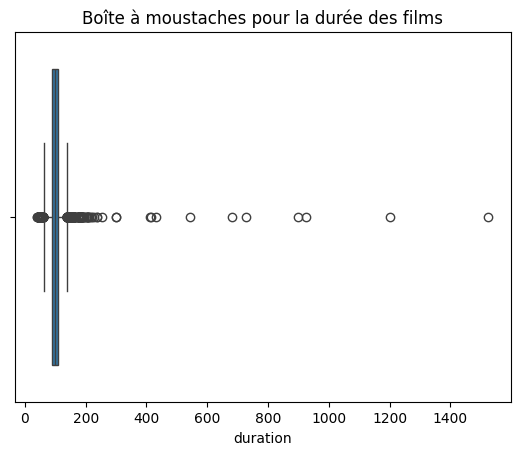

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boîte à moustaches pour 'duration'
sns.boxplot(x=df_movies_cleaned['duration'])
plt.title('Boîte à moustaches pour la durée des films')
plt.show()

In [110]:
# Sélectionner les films dont la durée est supérieure à 200 minutes
long_movies = df_movies_cleaned[df_movies_cleaned['duration'] > 200]

# Afficher les films sélectionnés
print(long_movies[['movie', 'duration']])

                                               movie  duration
753                                           Mayrig     217.0
905                                La belle histoire     210.0
1178                           La maman et la putain     208.0
1310               Hitler - ein Film aus Deutschland     410.0
1587  Jeanne la Pucelle: Les batailles - Les prisons     227.0
2072             Heimat - Eine Chronik in elf Teilen     924.0
2073        Die Zweite Heimat - Chronik einer Jugend    1525.0
2074                          Out 1: Noli me tangere     729.0
2090                                  Die Nibelungen     237.0
2097            Heimat 3 - Chronik einer Zeitenwende     680.0
2140                                           Shoah     544.0
2304                                   Welt am Draht     205.0
2309                                       Bolwieser     201.0
2679                                 Lady Chatterley     205.0
3343                                     L'amour fou   

### Standardiser les colonnes numeriques 

In [111]:
from sklearn.preprocessing import StandardScaler


# Colonnes numériques à standardiser
numeric_columns = ['humor', 'rhythm', 'effort', 'tension', 'vote', 'avg_vote']

# Initialiser le StandardScaler
scaler = StandardScaler()

# Standardiser les colonnes numériques
df_movies_cleaned[numeric_columns] = scaler.fit_transform(df_movies_cleaned[numeric_columns])

# Vérifier les données standardisées
df_movies_cleaned[numeric_columns].head()



C:\Users\gopit\AppData\Local\Temp\ipykernel_19292\403075277.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_cleaned[numeric_columns] = scaler.fit_transform(df_movies_cleaned[numeric_columns])


,humor,rhythm,effort,tension,vote,avg_vote
0,0.604741,0.706381,0.229373,1.880363,0.229243,-0.297279
1,0.604741,0.706381,-0.632338,0.989689,0.229243,0.064409
2,-0.580797,-0.146133,0.229373,-0.791659,-1.210330,-0.478123
3,1.790280,1.558894,-0.632338,0.099015,0.229243,-0.458029
4,0.604741,0.706381,0.229373,-0.791659,0.229243,-0.337467


In [112]:
df_movies_cleaned.head()

,id,movie,year,genre,duration,country,director,humor,rhythm,effort,tension,vote,avg_vote
0,71,Charlie Muffin,1979.0,Spy,109.0,Great Britain,Jack Gold,0.604741,0.706381,0.229373,1.880363,0.229243,-0.297279
1,78,Absolute Beginners,1986.0,Musical,100.0,Great Britain,Julien Temple,0.604741,0.706381,-0.632338,0.989689,0.229243,0.064409
2,94,Arrêt sur image,1987.0,Drama,77.0,France,Christine Allen,-0.580797,-0.146133,0.229373,-0.791659,-1.210330,-0.478123
3,97,Water,1985.0,Grotesque,97.0,Great Britain,Dick Clement,1.790280,1.558894,-0.632338,0.099015,0.229243,-0.458029
4,109,Adam and Evelyne,1949.0,Comedy,92.0,Great Britain,Harold French,0.604741,0.706381,0.229373,-0.791659,0.229243,-0.337467


In [113]:
df_movies_cleaned.to_csv('movies_clean.csv', index=False)

In [114]:
df_movies_cleaned['genre'].unique()

array(['Spy', 'Musical', 'Drama', 'Grotesque', 'Comedy', 'Western',
       'Horror', 'Biography', 'Thriller', 'Mélo', 'Adventure', 'History',
       'War', 'Crime', 'Animation', 'Sci-Fi', 'Documentary', 'Fantasy',
       'Romantic', 'Noir', 'Action', 'Erotico', 'Super-hero', 'Gangster',
       'Sperimental', 'Short Movie', 'Sport', 'Stand-up Comedy'],
      dtype=object)

In [115]:
df_movies_cleaned['country'].unique()

array(['Great Britain', 'France', 'Germany', 'Australia', 'Sweden',
       'Spain', 'Ireland', 'South Korea'], dtype=object)

In [116]:
df_movies_cleaned['director'].unique()

array(['Jack Gold', 'Julien Temple', 'Christine Allen', ...,
       'Judith Westermann', 'Adrian Powers', 'Patrik Eklund'],
      shape=(2821,), dtype=object)

### Cleaning Data (past_screening)

In [117]:
df_ps 

,week,day,room,screening,movie
0,0,0,0,0,Wallander: Skytten
1,0,0,0,1,Canola
2,0,0,0,2,Guns Akimbo
3,0,0,1,3,La mano de un hombre muerto
4,0,0,1,4,Vendetta for the Saint
...,...,...,...,...,...
19995,799,4,0,0,Woomuk-Baemi ui sarang
19996,799,4,0,1,Barrio
19997,799,4,0,2,Ce jour-là
19998,799,4,1,3,Fitzcarraldo


In [119]:
# Vérifier les doublons
df_ps.duplicated().sum()

np.int64(0)

In [ ]:
from datetime import datetime, timedelta

reference_date = datetime(2024, 1, 9)

def calculate_date(week, day):
    total_days = (week - 1) * 7 + (day - 1) 
    return reference_date + timedelta(days=total_days)


df_ps['date'] = df_ps.apply(lambda row: calculate_date(row['week'], row['day']), axis=1)

   week  day       date
0     0    0 2024-01-01
1     0    0 2024-01-01
2     0    0 2024-01-01
3     0    0 2024-01-01
4     0    0 2024-01-01


In [124]:
df_ps.head(5)

,week,day,room,screening,movie,date
0,0,0,0,0,Wallander: Skytten,2024-01-01
1,0,0,0,1,Canola,2024-01-01
2,0,0,0,2,Guns Akimbo,2024-01-01
3,0,0,1,3,La mano de un hombre muerto,2024-01-01
4,0,0,1,4,Vendetta for the Saint,2024-01-01


In [125]:
df_ps.drop(columns=['week', 'day'], inplace=True)

In [127]:
df_ps.head()

,room,screening,movie,date
0,0,0,Wallander: Skytten,2024-01-01
1,0,1,Canola,2024-01-01
2,0,2,Guns Akimbo,2024-01-01
3,1,3,La mano de un hombre muerto,2024-01-01
4,1,4,Vendetta for the Saint,2024-01-01


In [130]:
movies_clean = pd.read_csv('movies_clean.csv', header = 0)

columns_to_keep = ['movie', 'year', 'genre', 'director', 'country', 'duration', 'humor', 'rhythm', 'effort', 'tension', 'vote', 'avg_vote']
merged_data = df_ps.merge(movies_clean[columns_to_keep],on='movie', how='left')

merged_data.head(6)


,room,screening,movie,date,year,genre,director,country,duration,humor,rhythm,effort,tension,vote,avg_vote
0,0,0,Wallander: Skytten,2024-01-01,2009.0,Thriller,Agneta Fagerström-Olsson,Sweden,90.0,-0.580797,-0.998646,-0.632338,-0.791659,-1.210330,-0.437935
1,0,1,Canola,2024-01-01,2016.0,Drama,Chang,South Korea,117.0,-0.580797,-0.998646,-0.632338,-0.791659,1.668817,-0.437935
2,0,2,Guns Akimbo,2024-01-01,2019.0,Action,Jason Lei Howden,Great Britain,95.0,-0.580797,-0.998646,-0.632338,-0.791659,-0.490543,0.586847
3,1,3,La mano de un hombre muerto,2024-01-01,1962.0,Horror,Jesús Franco,Spain,95.0,-0.580797,-0.998646,-0.632338,-0.791659,0.229243,-0.478123
4,1,4,Vendetta for the Saint,2024-01-01,1973.0,Spy,Jim O' Connolly,Great Britain,100.0,-0.580797,0.706381,-0.632338,0.989689,0.229243,-0.216904
5,0,0,Banchikwwang,2024-01-02,2000.0,Comedy,Kim Ji-woon,South Korea,112.0,-0.580797,-0.998646,-0.632338,-0.791659,0.229243,-0.297279


In [131]:
merged_data.to_csv('Merge_Data.csv', index=False)

In [139]:
merged_data.to_excel('Merge_D.xlsx', index=False)